# GEOSPATIAL DATA SCIENCES WITH JULIA

## Modules used in this course

In [30]:
using DataFrames 
using GeoStats
using GeoIO
import CairoMakie as Mke
using PairPlots

In [1]:
Paths = "D:\\MAIN\\MODELS\\SPATIAL\\geospatial-data-science-with-julia\\"

"D:\\MAIN\\MODELS\\SPATIAL\\geospatial-data-science-with-julia\\"

In [32]:
"""Example of data and abstracting data by using tupples"""

coltable = (
  NAME=["John", "Mary", "Paul", "Anne", "Kate"],
  AGE=[34, 12, 23, 39, 28],
  HEIGHT=[1.78, 1.56, 1.70, 1.80, 1.72],
  GENDER=["male", "female", "male", "female", "female"]
)

coltable.NAME[2:3]

2-element Vector{String}:
 "Mary"
 "Paul"

In [33]:
""" Better way of abstracting data via dataframe"""

df = DataFrame(
  NAME=["John", "Mary", "Paul", "Anne", "Kate"],
  AGE=[34, 12, 23, 39, 28],
  HEIGHT=[1.78, 1.56, 1.70, 1.80, 1.72],
  GENDER=["male", "female", "male", "female", "female"]
)

Row,NAME,AGE,HEIGHT,GENDER
,String,Int64,Float64,String
1,John,34,1.78,male
2,Mary,12,1.56,female
3,Paul,23,1.7,male
4,Anne,39,1.8,female
5,Kate,28,1.72,female


In [34]:
""" Abstracting data of interest"""

df[1:3,["NAME","AGE"]]



Row,NAME,AGE
,String,Int64
1,John,34
2,Mary,12
3,Paul,23


In [35]:
"""Other ways of abstracting data"""

df.NAME[1:3]

3-element Vector{String}:
 "John"
 "Mary"
 "Paul"

# Geometries

In [36]:
""" GEOMETRIES """

p = GeoStats.Point(1, 2)
s = GeoStats.Segment((0, 2), (1, 3))
t = GeoStats.Triangle((0, 0), (1, 0), (1, 1))
b = GeoStats.Ball((2, 2), 1)
geoms = [p, s, t, b]

4-element Vector{Geometry{2, Float64}}:
 Point(1.0, 2.0)
 Segment((0.0, 2.0), (1.0, 3.0))
 Triangle((0.0, 0.0), (1.0, 0.0), (1.0, 1.0))
 Ball(center: (2.0, 2.0), radius: 1.0)

In [37]:
""" Because these geometries are unaware of each other, we place them into a GeometrySet, informally known in computational geometry as the“soup of geometries” data structure """

gset = GeoStats.GeometrySet(geoms)

4 GeometrySet{2,Float64}
├─ Point(1.0, 2.0)
├─ Segment((0.0, 2.0), (1.0, 3.0))
├─ Triangle((0.0, 0.0), (1.0, 0.0), (1.0, 1.0))
└─ Ball(center: (2.0, 2.0), radius: 1.0)

In [38]:
""" Performing some mathematics """

GeoStats.length(s), GeoStats.area(t), GeoStats.area(b)


(1.4142135623730951, 0.5, 3.141592653589793)

### One of the main limitations of GIS software today is the lack of explicit representation of **topology**.


	


In [39]:
grid = GeoStats.CartesianGrid(10, 10)
grid[100]

Quadrangle{2,Float64}
├─ Point(9.0, 9.0)
├─ Point(10.0, 9.0)
├─ Point(10.0, 10.0)
└─ Point(9.0, 10.0)

In [40]:
# global vector of 2D points
points = [(0.0, 0.0), (1.0, 0.0), (0.0, 1.0), (1.0, 1.0), (0.25, 0.5), (0.75, 0.5)]

# connect the points into N-gons
connec = GeoStats.connect.([(1, 2, 6, 5), (2, 4, 6), (4, 3, 5, 6), (3, 1, 15)])

# 2D mesh made of N-gon elements
mesh = GeoStats.SimpleMesh(points, connec)


4 SimpleMesh{2,Float64}
  6 vertices
  ├─ Point(0.0, 0.0)
  ├─ Point(1.0, 0.0)
  ├─ Point(0.0, 1.0)
  ├─ Point(1.0, 1.0)
  ├─ Point(0.25, 0.5)
  └─ Point(0.75, 0.5)
  4 elements
  ├─ Quadrangle(1, 2, 6, 5)
  ├─ Triangle(2, 4, 6)
  ├─ Quadrangle(4, 3, 5, 6)
  └─ Triangle(3, 1, 15)

In [41]:
# Connecting differet shapes & points

c = GeoStats.connect((1, 2, 3))
GeoStats.materialize(c, [Point(0, 0), Point(1, 0), Point(1, 1)])

Triangle{2,Float64}
├─ Point(0.0, 0.0)
├─ Point(1.0, 0.0)
└─ Point(1.0, 1.0)

In [42]:
mesh[1]


Quadrangle{2,Float64}
├─ Point(0.0, 0.0)
├─ Point(1.0, 0.0)
├─ Point(0.75, 0.5)
└─ Point(0.25, 0.5)

In [43]:
# Creating a geospatial data with dataframe with units

df = DataFrame(
  NAME=["John", "Mary", "Paul", "Anne"],
  AGE=[34.0, 12.0, 23.0, 39.0]u"yr",
  HEIGHT=[1.78, 1.56, 1.70, 1.80]u"m",
  GENDER=["male", "female", "male", "female"]
)

#Grid size
grid = GeoStats.CartesianGrid(2, 2)
geotable = GeoStats.georef(df, grid)

NAME,AGE,HEIGHT,GENDER,geometry
Categorical,Continuous,Continuous,Categorical,Quadrangle
[NoUnits],[yr],[m],[NoUnits],
John,34.0 yr,1.78 m,male,"Quadrangle((0.0, 0.0), ..., (0.0, 1.0))"
Mary,12.0 yr,1.56 m,female,"Quadrangle((1.0, 0.0), ..., (1.0, 1.0))"
Paul,23.0 yr,1.7 m,male,"Quadrangle((0.0, 1.0), ..., (0.0, 2.0))"
Anne,39.0 yr,1.8 m,female,"Quadrangle((1.0, 1.0), ..., (1.0, 2.0))"


In [44]:
geotable.AGE[2:3]

# Determening names
DataFrames.names(geotable)

# The geometry
geotable.geometry[1:4]

4-element Vector{Quadrangle{2, Float64}}:
 Quadrangle((0.0, 0.0), ..., (0.0, 1.0))
 Quadrangle((1.0, 0.0), ..., (1.0, 1.0))
 Quadrangle((0.0, 1.0), ..., (0.0, 2.0))
 Quadrangle((1.0, 1.0), ..., (1.0, 2.0))

In [45]:
geotable[GeoStats.Segment((0, 0), (1, 0)), :]

NAME,AGE,HEIGHT,GENDER,geometry
Categorical,Continuous,Continuous,Categorical,Quadrangle
[NoUnits],[yr],[m],[NoUnits],
John,34.0 yr,1.78 m,male,"Quadrangle((0.0, 0.0), ..., (0.0, 1.0))"


In [46]:
# Easy way with dataframework
df= DataFrame(
	R=rand(100),
	G=rand(100),
	B=rand(100))

#Grid size
grid = GeoStats.CartesianGrid(10, 10)
geotable = GeoStats.georef(df, grid)

R,G,B,geometry
Continuous,Continuous,Continuous,Quadrangle
[NoUnits],[NoUnits],[NoUnits],
0.278871,0.317152,0.936084,"Quadrangle((0.0, 0.0), ..., (0.0, 1.0))"
0.943539,0.488189,0.983204,"Quadrangle((1.0, 0.0), ..., (1.0, 1.0))"
0.802478,0.987638,0.523457,"Quadrangle((2.0, 0.0), ..., (2.0, 1.0))"
0.92139,0.600542,0.335026,"Quadrangle((3.0, 0.0), ..., (3.0, 1.0))"
0.681827,0.584584,0.306862,"Quadrangle((4.0, 0.0), ..., (4.0, 1.0))"
0.454518,0.316822,0.128493,"Quadrangle((5.0, 0.0), ..., (5.0, 1.0))"
0.64281,0.798822,0.1397,"Quadrangle((6.0, 0.0), ..., (6.0, 1.0))"
0.975295,0.838444,0.67438,"Quadrangle((7.0, 0.0), ..., (7.0, 1.0))"


In [47]:
# A short cut
GeoStats.georef(
  (
    R=rand(100),
    G=rand(100),
    B=rand(100)
  ),
  GeoStats.CartesianGrid(10, 10)
)

R,G,B,geometry
Continuous,Continuous,Continuous,Quadrangle
[NoUnits],[NoUnits],[NoUnits],
0.907739,0.403089,0.403671,"Quadrangle((0.0, 0.0), ..., (0.0, 1.0))"
0.962704,0.879745,0.139931,"Quadrangle((1.0, 0.0), ..., (1.0, 1.0))"
0.990085,0.00220962,0.460329,"Quadrangle((2.0, 0.0), ..., (2.0, 1.0))"
0.162561,0.937889,0.841577,"Quadrangle((3.0, 0.0), ..., (3.0, 1.0))"
0.386337,0.932241,0.62069,"Quadrangle((4.0, 0.0), ..., (4.0, 1.0))"
0.321217,0.94052,0.572313,"Quadrangle((5.0, 0.0), ..., (5.0, 1.0))"
0.476482,0.460262,0.793736,"Quadrangle((6.0, 0.0), ..., (6.0, 1.0))"
0.323264,0.399195,0.540503,"Quadrangle((7.0, 0.0), ..., (7.0, 1.0))"


In [48]:
# he DataFrame syntax is not type stable. If you need to write type-stable code, use the functions values and domain instead:

GeoStats.values(geotable)

Row,R,G,B
,Float64,Float64,Float64
1,0.278871,0.317152,0.936084
2,0.943539,0.488189,0.983204
3,0.802478,0.987638,0.523457
4,0.92139,0.600542,0.335026
5,0.681827,0.584584,0.306862
6,0.454518,0.316822,0.128493
7,0.64281,0.798822,0.1397
8,0.975295,0.838444,0.67438
9,0.354564,0.706011,0.135293


# PART II:  Visualisation

In [49]:
A=rand(10)
B=rand(10)
img = GeoStats.georef((; A, B))


A,B,geometry
Continuous,Continuous,Segment
[NoUnits],[NoUnits],
0.3272,0.232237,"Segment((0.0,), (1.0,))"
0.744963,0.202484,"Segment((1.0,), (2.0,))"
0.0297896,0.681498,"Segment((2.0,), (3.0,))"
0.389427,0.601631,"Segment((3.0,), (4.0,))"
0.655023,0.440829,"Segment((4.0,), (5.0,))"
0.667657,0.0977414,"Segment((5.0,), (6.0,))"
0.0546737,0.117431,"Segment((6.0,), (7.0,))"
0.152128,0.77665,"Segment((7.0,), (8.0,))"


In [50]:
"""The georef function will create a CartesianGrid starting at the origin whenever the domain is omitted. The size of the grid is taken as the size of the first array in the named tuple"""

img.geometry



10 CartesianGrid{1,Float64}
  minimum: Point(0.0,)
  maximum: Point(10.0,)
  spacing: (1.0,)

In [51]:
viz(img.geometry, color = img.A, alpha = rand(length(img.B)))

In [52]:
using GeoIO

gis = GeoIO.load(Paths * "/data/geotable.geojson")


NAME,geometry
Categorical,MultiPolygon
[NoUnits],
Estuario,Multi(21×PolyArea)
Fronteiras Antigas,Multi(1×PolyArea)
Fronteiras Intermediarias,Multi(1×PolyArea)
Fronteiras Novas,Multi(2×PolyArea)


In [53]:
GeoStats.viz(img.geometry, color = 1:100,  axis = (; aspect = Mke.DataAspect()))

GeoStats.viz!(gis.geometry, color = 1:4)

pts = [GeoStats.Point(-20, -10), Point(-20, 0), Point(-40, 10)]
viz!(pts, color = 1:3)

seg = [Segment((-40, -10), (0, 0)), Segment((-40, 0), (-20, 10))]
viz!(seg, color = 1:2)

Mke.current_figure()

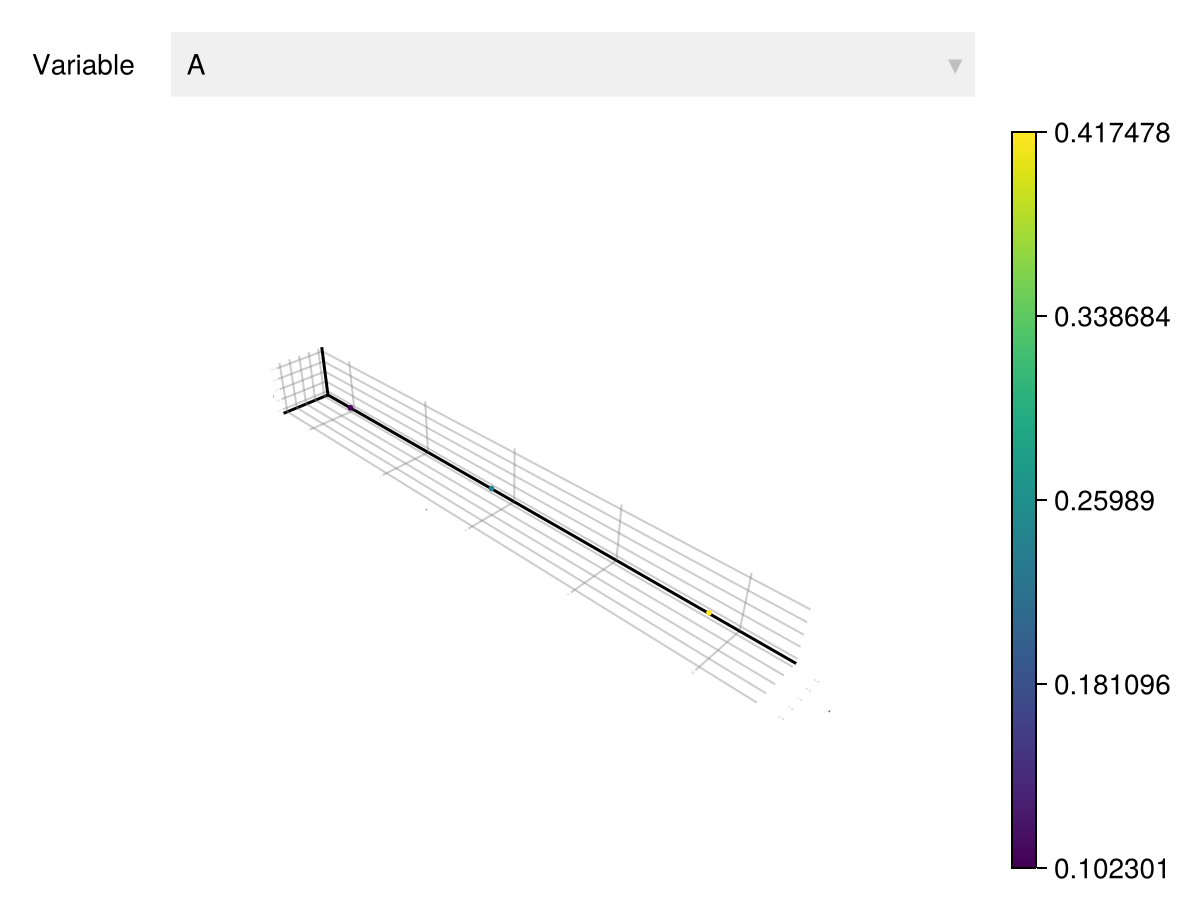

In [54]:
# Plotting X or Y with the coordinates

XYZ = [[0.0 1.0 2.0]; [0.0 10.0 20.0]; [0.0 1.0 2.0]]

geotable = GeoStats.georef((A=rand(3), B=rand(3)), XYZ)

GeoStats.viewer(geotable)

In [55]:
geotable = georef((; A=[1,2,3,4]u"m"), CartesianGrid(2, 2))

A,geometry
Categorical,Quadrangle
[m],
1 m,"Quadrangle((0.0, 0.0), ..., (0.0, 1.0))"
2 m,"Quadrangle((1.0, 0.0), ..., (1.0, 1.0))"
3 m,"Quadrangle((0.0, 1.0), ..., (0.0, 2.0))"
4 m,"Quadrangle((1.0, 1.0), ..., (1.0, 2.0))"


In [11]:
outer = [(0.0, 0.0), (1.0, 0.0), (1.0, 1.0), (0.0, 1.0)]
hole1 = [(0.2, 0.2), (0.4, 0.2), (0.4, 0.4), (0.2, 0.4)]
hole2 = [(0.6, 0.2), (0.8, 0.2), (0.8, 0.4), (0.6, 0.4)]
poly  = PolyArea([outer, hole1, hole2])

r = rings(poly)

# Transform the shapes into the segments
collect(segments(first(r)))

4-element Vector{Segment{2, Float64}}:
 Segment((0.0, 0.0), (1.0, 0.0))
 Segment((1.0, 0.0), (1.0, 1.0))
 Segment((1.0, 1.0), (0.0, 1.0))
 Segment((0.0, 1.0), (0.0, 0.0))

In [ ]:
using GeoStats

p = Point(0.0, 0.0)
b = Ball((0.5, 0.5), 1.0)

viz([p, b], color = ["teal", "slategray3"])


In [ ]:
p = Point(0.0, 0.0)
b = Ball((0.5, 0.5), 1.0)

viz([p, b], color = ["teal", "slategray3"])


In [ ]:
b1 = Box((0, 0), (1, 1))
b2 = Box((0.5, 0.5), (2, 2))

viz([b1, b2], color = ["teal", "slategray3"])


In [ ]:
outer = [(0.0, 0.0), (1.0, 0.0), (1.0, 1.0), (0.0, 1.0)]
hole1 = [(0.2, 0.2), (0.4, 0.2), (0.4, 0.4), (0.2, 0.4)]
hole2 = [(0.6, 0.2), (0.8, 0.2), (0.8, 0.4), (0.6, 0.4)]
poly  = PolyArea([outer, hole1, hole2])
ball1 = Ball((0.5, 0.5), 0.05)
ball2 = Ball((0.3, 0.3), 0.05)

viz([poly, ball1, ball2], color = ["slategray3", "teal", "brown"])


In [ ]:
s1 = Segment((0.0, 0.0), (1.0, 0.0))
s2 = Segment((0.5, 0.0), (2.0, 0.0))
B=s1 ∩ s2

viz([B])

In [ ]:
intersection(s1, s2) do I
	println(Crossing)
	if I == Crossing
	  return 1
	else
	  return 0
	end
 end


In [ ]:
poly1 = Ngon((0, 1), (1, 0), (2, 1), (3, 0), (4, 1), (2, 2))
poly2 = Ngon((1.0, 0.5), (3.5, 0.0), (3.5, 1.5), (1.0, 1.5))

poly =poly1 ∩ poly2
viz([poly1, poly2, poly], color=[:red, :blue, :green])


In [ ]:
boundary(poly)
perimeter(poly)

In [ ]:
points=rand(Point2, 100)
viz(convexhull(points))

In [ ]:
ball = Ball((0, 0), 1)

mesh = discretize(ball, RegularDiscretization(20, 50))
viz(mesh, showsegments=true) 


In [ ]:
mesh = discretize(Box((0, 0), (1, 1)))
viz(mesh)
tmesh = refine(mesh, TriRefinement())

viz(tmesh, showsegments = true)

In [ ]:
grid = CartesianGrid(2, 3)

centroid.(grid)
topo = topology(grid)


In [ ]:
N=10000
a = [2randn(N÷2) .+ 6; randn(N÷2)]
b = [3randn(N÷2); 2randn(N÷2)]
c = randn(N)
d = c .+ 0.6randn(N)
table=(;a,b,c,d)
gt = georef(table, CartesianGrid(100, 100))

In [ ]:
table.a
Mke.hist(gt.a[1,:], color = "gray80")
cor(gt.a, gt.b)



pairplot(values(gt))


In [ ]:
gt |> Select("a", "b") # select columns "a" and "b"
gt |> Select(1:3) # select columns 1 to 3
gt |> Select(r"[bcd]") # columns matching regular expressio

In [ ]:
gt |> Select("a" => "A", "b" => "B")
gt |> Reject("b") # reject column "b"



In [ ]:
gt |> Select("a") |> viewer

In [ ]:
gt |> Identity()